# Analysis of Wave Height and Location of Crest

In [3]:
pip install vtk

Note: you may need to restart the kernel to use updated packages.


In [1]:
%matplotlib inline
import vtk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpltools import annotation

In [2]:
# want to test the following dx
dx = [0.01,0.02,0.05,0.08, 0.1,0.13,0.15,0.17,0.2,0.25,0.5,1] 
# however only is able to run dx = 0.05 0.08 0.1 0.15 0.2 0.5 1 , the program gets stuck when dx = 0.01, 0.02
tmax = 30.0
dt_file = 0.1 # output file every 0.1s

In [3]:
def vtp_to_dataframe(filepath):
    reader = vtk.vtkXMLPolyDataReader()
    reader.SetFileName(filepath)
    reader.Update()

    pdata = reader.GetOutput()

    p_x, p_y, density, boundary = [], [], [], []
    for i in range(pdata.GetNumberOfPoints()):
        p_x.append(pdata.GetPoint(i)[0])
        p_y.append(pdata.GetPoint(i)[1])
        density.append(pdata.GetPointData().GetArray('Density').GetValue(i))
        boundary.append(pdata.GetPointData().GetArray('Boundary').GetValue(i))
        #print(i)

    return pd.DataFrame({'p_x':p_x, 'p_y':p_y, 'density':density, 'boundary':boundary})


def crest(index):
    X, Y, step = [], [], []
   
    nb_itr = int(tmax/dt_file - 1)
    for i in range(nb_itr):
        filepath = "./tests_"+str(index)+"/step_" + str(i) + ".vtp"
        A = vtp_to_dataframe(filepath)
        A = A[(A.boundary == 0) & (A.density > 900)]
        A = A[A['p_y'].isin([A['p_y'].max()])]
        step.append(i)
        X.append(A['p_x'].max())
        Y.append(A['p_y'].max())
        #print(i)

    pd.set_option('display.max_rows', None)
   
    return pd.DataFrame({'step':step, 'X':X, 'Y':Y})

In [4]:
# get the dataframes for analysis
B_3 = crest(3)
print(3)

B_4 = crest(4)
print(4)

B_5 = crest(5)
print(5)

B_7 = crest(7)
print(7)

B_9 = crest(9)
print(9)

B_11 = crest(11)
print(11)

B_12 = crest(12)
print(12)

3
4
5
7
9
11
12


# The location of Crest as a function of time 

    step          X         Y
0      0   0.096297  4.850765
1      1   0.090426  4.713259
2      2   0.086637  4.512273
3      3   0.092363  4.406228
4      4   0.093724  4.305926
5      5   0.090805  4.159288
6      6   0.090365  3.978656
7      7   5.143615  3.914803
8      8   5.489270  4.044612
9      9   6.105644  4.148993
10    10   6.693197  4.170450
11    11   6.978872  4.165560
12    12   7.823721  4.069717
13    13   8.243528  3.972944
14    14   8.696038  3.831224
15    15   9.520422  3.712215
16    16  10.342214  3.656956
17    17  11.248247  3.753511
18    18  11.881564  3.808973
19    19  12.530229  3.864163
20    20  13.195849  3.870137
21    21  13.857737  3.797376
22    22  14.865156  3.750153
23    23  15.612493  3.672876
24    24  14.952780  3.598301
25    25  15.443132  3.584578
26    26  15.944889  3.536187
27    27  17.558003  3.517960
28    28  18.185449  3.599120
29    29  18.843166  3.608775
30    30  19.588352  4.121348
31    31  19.672101  4.833874
32    32  

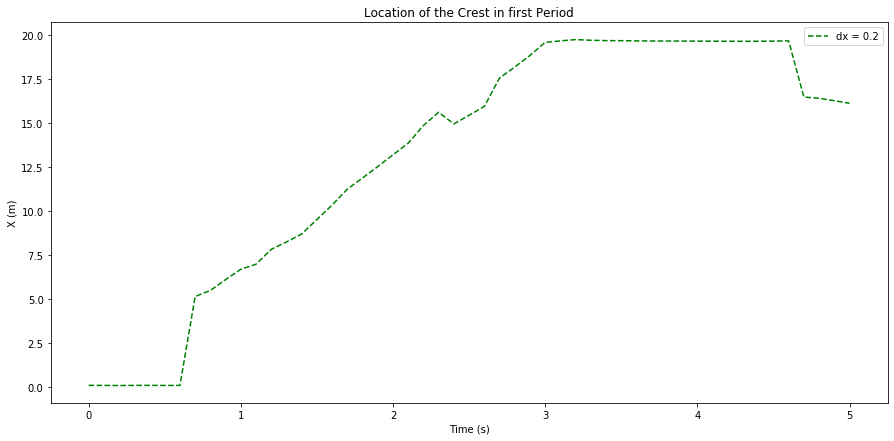

In [5]:
time = np.array(B_9['step'].tolist())*dt_file

X_3 = np.array(B_3['X'].tolist())
Y_3 = np.array(B_3['Y'].tolist())

X_4 = np.array(B_4['X'].tolist())
Y_4 = np.array(B_4['Y'].tolist())


X_5 = np.array(B_5['X'].tolist())
Y_5 = np.array(B_5['Y'].tolist())

X_7 = np.array(B_7['X'].tolist())
Y_7 = np.array(B_7['Y'].tolist())

X_9 = np.array(B_9['X'].tolist())
Y_9 = np.array(B_9['Y'].tolist())

X_11 = np.array(B_11['X'].tolist())
Y_11 = np.array(B_11['Y'].tolist())


X_12 = np.array(B_12['X'].tolist())
Y_12 = np.array(B_12['Y'].tolist())

B_9_cut = B_9[(B_9.step <= 50)]
print(B_9_cut)

fig = plt.figure(figsize = (15,7))

X_9_cut = B_9_cut.X
time_cut = np.array(B_9_cut.step)*dt_file
plt.plot(time_cut,X_9_cut,'--',label = 'dx = 0.2',color = 'green')

plt.title('Location of the Crest in first Period')
plt.ylabel('X (m)')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

In [9]:
print('Sloshing interval = ' + str(32*dt_file) + ' s')

Sloshing interval = 3.2 s


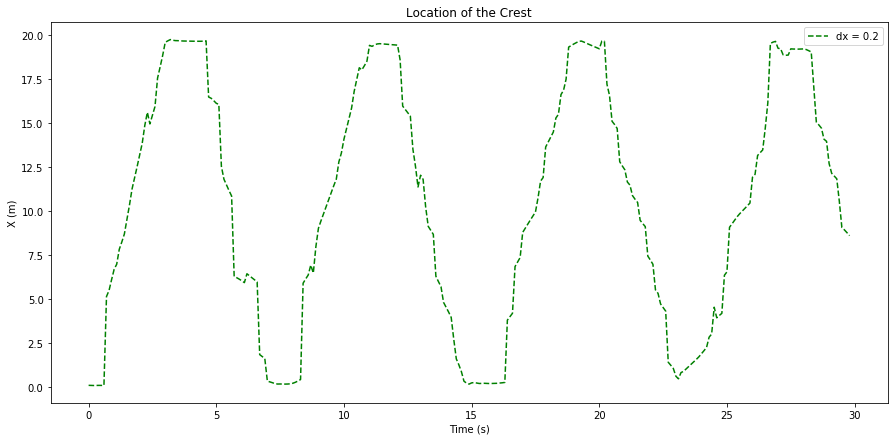

In [10]:
fig = plt.figure(figsize = (15,7))


plt.plot(time,X_9,'--',label = 'dx = 0.2',color = 'green')

plt.title('Location of the Crest')
plt.ylabel('X (m)')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

# Wave Height as a function of time

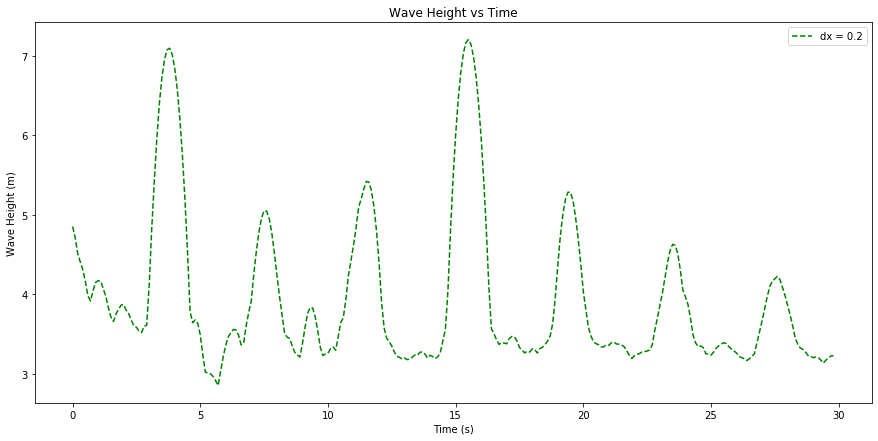

In [11]:
fig = plt.figure(figsize = (15,7))


plt.plot(time,Y_9,'--',label = 'dx = 0.2',color = 'green')

plt.title('Wave Height vs Time')
plt.ylabel('Wave Height (m)')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

# The location of crest vs dx

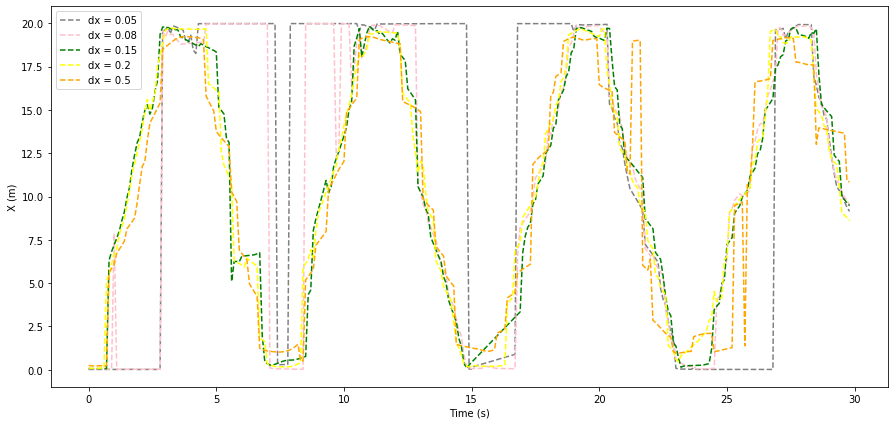

In [12]:
fig = plt.figure(figsize = (15,7))

plt.plot(time,X_3,'--',label = 'dx = 0.05',color = 'grey')
plt.plot(time,X_4,'--',label = 'dx = 0.08',color = 'pink')
#plt.plot(time,X_5,'--',label = 'dx = 0.1',color = 'blue')
plt.plot(time,X_7,'--',label = 'dx = 0.15',color = 'green')
plt.plot(time,X_9,'--',label = 'dx = 0.2',color = 'yellow')
plt.plot(time,X_11,'--',label = 'dx = 0.5',color = 'orange')
#plt.plot(time,X_12,'--',label = 'dx = 1',color = 'red')

plt.ylabel('X (m)')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

# TODO: vary delta X and plot

# Wave Height vs dx

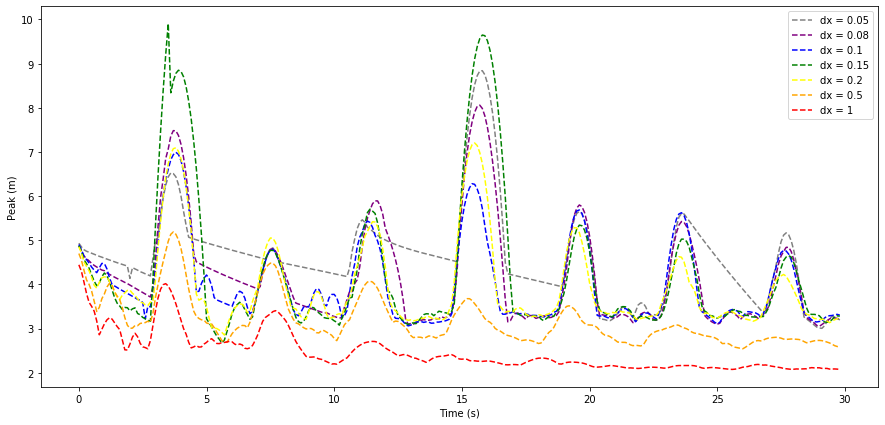

In [13]:
fig = plt.figure(figsize = (15,7))

plt.plot(time,Y_3,'--',label = 'dx = 0.05',color = 'grey')
plt.plot(time,Y_4,'--',label = 'dx = 0.08',color = 'purple')
plt.plot(time,Y_5,'--',label = 'dx = 0.1',color = 'blue')
plt.plot(time,Y_7,'--',label = 'dx = 0.15',color = 'green')
plt.plot(time,Y_9,'--',label = 'dx = 0.2',color = 'yellow')
plt.plot(time,Y_11,'--',label = 'dx = 0.5',color = 'orange')
plt.plot(time,Y_12,'--',label = 'dx = 1',color = 'red')


plt.ylabel('Peak (m)')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

# TODO: vary delta X and plot

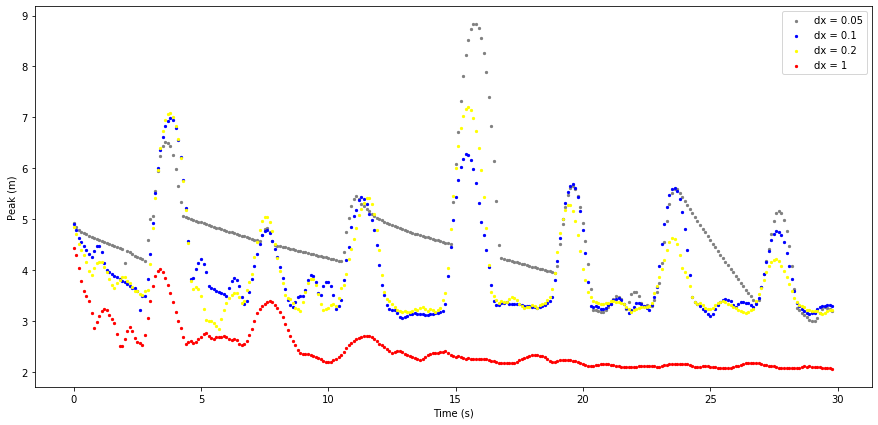

In [14]:
fig = plt.figure(figsize = (15,7))

plt.scatter(time,Y_3,label = 'dx = 0.05',color = 'grey',s = 5)

plt.scatter(time,Y_5,label = 'dx = 0.1',color = 'blue',s = 5)
 
plt.scatter(time,Y_9,label = 'dx = 0.2',color = 'yellow',s = 5)

plt.scatter(time,Y_12,label = 'dx = 1',color = 'red',s = 5)


plt.ylabel('Peak (m)')
plt.xlabel('Time (s)')
plt.legend()
plt.show()


# Forward Euler Convergence Analysis

In [15]:
v = np.zeros(6)
dx_v = [0.05,0.08,0.1,0.15,0.2,0.5]

v[0] = abs((X_3[230] - X_3[220])/(10*dt_file))
v[1] = abs((X_4[230] - X_4[220])/(10*dt_file))
v[2] = abs((X_5[230] - X_5[220])/(10*dt_file))
v[3] = abs((X_7[230] - X_7[220])/(10*dt_file))
v[4] = abs((X_9[230] - X_9[220])/(10*dt_file))
v[5] = abs((X_11[230] - X_11[220])/(10*dt_file))

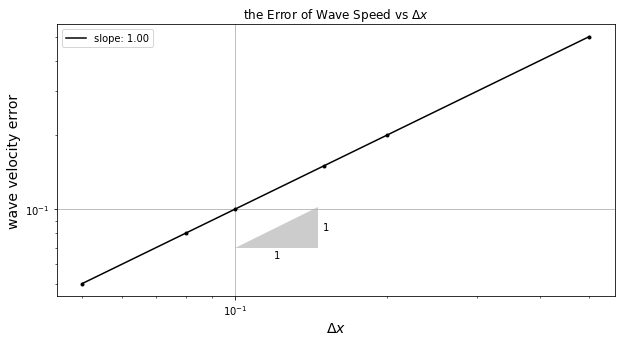

Forward euler is first order convergence.


In [16]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax1.loglog(dx_v, np.abs(dx_v,v-v[0]), 'k.')

ax1.set_xlabel('$\Delta x$', fontsize=14)
ax1.set_ylabel('wave velocity error', fontsize=14)
ax1.grid(True)

start_fit = 0

line_fit_fe = np.polyfit(np.log(dx_v[start_fit:]), np.log(np.abs(dx_v,v-v[0])[start_fit:]), 1)

ax1.loglog(dx_v, np.exp(line_fit_fe[1]) * dx_v**(line_fit_fe[0]), 'k-', label = 'slope: {:.2f}'.format(line_fit_fe[0]))

annotation.slope_marker((1e-1, 7e-2), (1, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)
ax1.legend(loc='best')
plt.title('the Error of Wave Speed vs $\Delta x$ ')
plt.show()
print('Forward euler is first order convergence.')

In [17]:
def get_full_data(index,i):
    filepath = "./tests_"+str(index)+"/step_" + str(i) + ".vtp"
    A = vtp_to_dataframe(filepath)
    A = A[(A.boundary == 0) & (A.density > 900)]
    return A

In [18]:
check_time = 2.5

step_nb = int(2.5/dt_file)
Full_data_3 = get_full_data(3,step_nb)
Full_data_4 = get_full_data(4,step_nb)
Full_data_5 = get_full_data(5,step_nb)
Full_data_7 = get_full_data(7,step_nb)
Full_data_9 = get_full_data(9,step_nb)
Full_data_11 = get_full_data(11,step_nb)
Full_data_12 = get_full_data(12,step_nb)

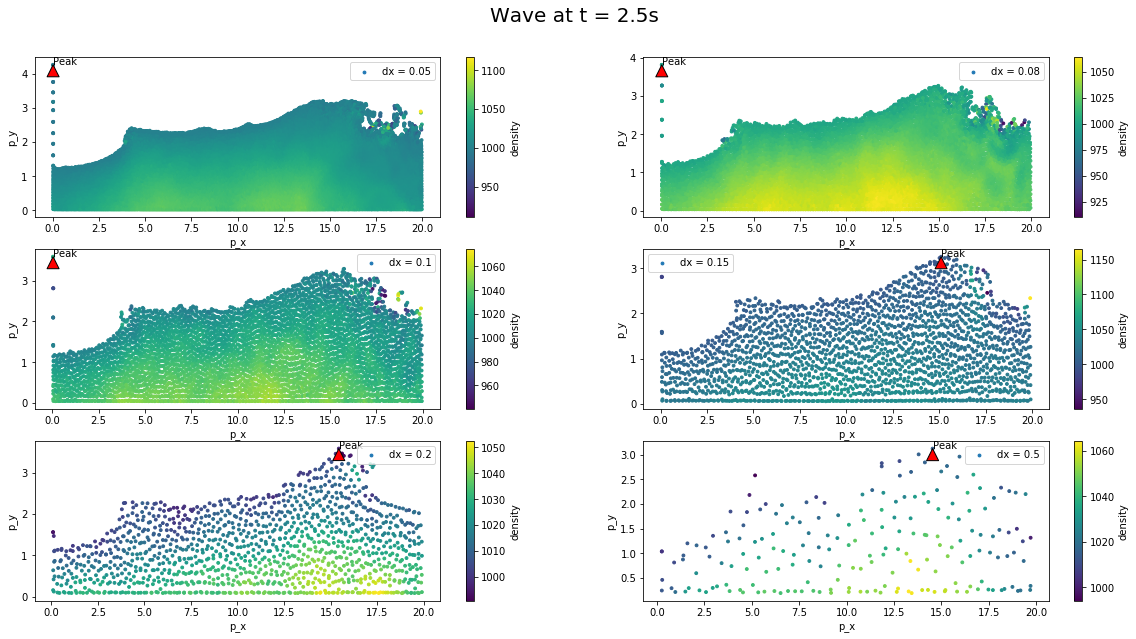

In [19]:
# dx = 0.05
fig, ax = plt.subplots(3, 2, figsize=(20, 10))
p_x = np.array(Full_data_3['p_x'].tolist())
p_y = np.array(Full_data_3['p_y'].tolist())
Full_data_3.plot.scatter(x = 'p_x',y = 'p_y',s = 8,c = 'density',colormap='viridis', ax = ax[0][0], label = 'dx = 0.05')
max_indx=np.argmax(np.array(Full_data_3['p_y'].tolist()))
ax[0][0].annotate( 'Peak',xy=(p_x[max_indx], p_y[max_indx]), \
             arrowprops=dict(facecolor='Red', shrink=0.01))


# dx = 0.08

p_x = np.array(Full_data_4['p_x'].tolist())
p_y = np.array(Full_data_4['p_y'].tolist())
Full_data_4.plot.scatter(x = 'p_x',y = 'p_y',s = 8,c = 'density',colormap='viridis', ax = ax[0][1], label = 'dx = 0.08')
max_indx=np.argmax(np.array(Full_data_4['p_y'].tolist()))
ax[0][1].annotate( 'Peak',xy=(p_x[max_indx], p_y[max_indx]), \
             arrowprops=dict(facecolor='Red', shrink=0.01))

# dx = 0.1
p_x = np.array(Full_data_5['p_x'].tolist())
p_y = np.array(Full_data_5['p_y'].tolist())
Full_data_5.plot.scatter(x = 'p_x',y = 'p_y',s = 8,c = 'density',colormap='viridis', ax = ax[1][0], label = 'dx = 0.1')
max_indx=np.argmax(np.array(Full_data_5['p_y'].tolist()))
ax[1][0].annotate( 'Peak',xy=(p_x[max_indx], p_y[max_indx]), \
             arrowprops=dict(facecolor='Red', shrink=0.01))

# dx = 0.15

p_x = np.array(Full_data_7['p_x'].tolist())
p_y = np.array(Full_data_7['p_y'].tolist())
Full_data_7.plot.scatter(x = 'p_x',y = 'p_y',s = 8,c = 'density',colormap='viridis', ax = ax[1][1], label = 'dx = 0.15')
max_indx=np.argmax(np.array(Full_data_7['p_y'].tolist()))
ax[1][1].annotate( 'Peak',xy=(p_x[max_indx], p_y[max_indx]), \
             arrowprops=dict(facecolor='Red', shrink=0.01))

# dx = 0.2
p_x = np.array(Full_data_9['p_x'].tolist())
p_y = np.array(Full_data_9['p_y'].tolist())
Full_data_9.plot.scatter(x = 'p_x',y = 'p_y',s = 8,c = 'density',colormap='viridis', ax = ax[2][0], label = 'dx = 0.2')
max_indx=np.argmax(np.array(Full_data_9['p_y'].tolist()))
ax[2][0].annotate( 'Peak',xy=(p_x[max_indx], p_y[max_indx]), \
             arrowprops=dict(facecolor='Red', shrink=0.01))
# dx = 0.5

p_x = np.array(Full_data_11['p_x'].tolist())
p_y = np.array(Full_data_11['p_y'].tolist())
Full_data_11.plot.scatter(x = 'p_x',y = 'p_y',s = 8,c = 'density',colormap='viridis', ax = ax[2][1], label = 'dx = 0.5')
max_indx=np.argmax(np.array(Full_data_11['p_y'].tolist()))
ax[2][1].annotate( 'Peak',xy=(p_x[max_indx], p_y[max_indx]), \
             arrowprops=dict(facecolor='Red', shrink=0.01))

fig.suptitle('Wave at t = 2.5s', y = 0.95 ,size = 20.0)
plt.show()

In [20]:
check_time = 23

step_nb = int(check_time/dt_file)
Full_data_3 = get_full_data(3,step_nb)
Full_data_4 = get_full_data(4,step_nb)
Full_data_5 = get_full_data(5,step_nb)
Full_data_7 = get_full_data(7,step_nb)
Full_data_9 = get_full_data(9,step_nb)
Full_data_11 = get_full_data(11,step_nb)
Full_data_12 = get_full_data(12,step_nb)

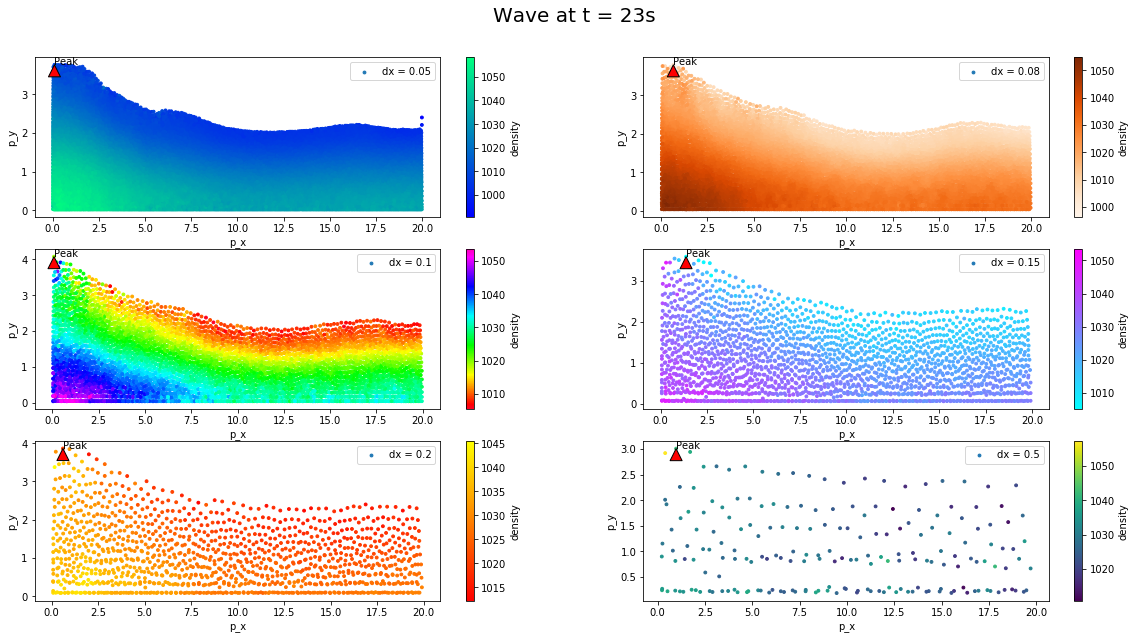

In [21]:
# dx = 0.05

fig, ax = plt.subplots(3, 2, figsize=(20, 10))
p_x = np.array(Full_data_3['p_x'].tolist())
p_y = np.array(Full_data_3['p_y'].tolist())
Full_data_3.plot.scatter(x = 'p_x',y = 'p_y',s = 8,c = 'density',colormap='winter', ax = ax[0][0], label = 'dx = 0.05')
max_indx=np.argmax(np.array(Full_data_3['p_y'].tolist()))
ax[0][0].annotate( 'Peak',xy=(p_x[max_indx], p_y[max_indx]), \
             arrowprops=dict(facecolor='Red', shrink=0.01))


# dx = 0.08

p_x = np.array(Full_data_4['p_x'].tolist())
p_y = np.array(Full_data_4['p_y'].tolist())
Full_data_4.plot.scatter(x = 'p_x',y = 'p_y',s = 8,c = 'density',colormap='Oranges', ax = ax[0][1], label = 'dx = 0.08')
max_indx=np.argmax(np.array(Full_data_4['p_y'].tolist()))
ax[0][1].annotate( 'Peak',xy=(p_x[max_indx], p_y[max_indx]), \
             arrowprops=dict(facecolor='Red', shrink=0.01))

# dx = 0.1
p_x = np.array(Full_data_5['p_x'].tolist())
p_y = np.array(Full_data_5['p_y'].tolist())
Full_data_5.plot.scatter(x = 'p_x',y = 'p_y',s = 8,c = 'density',colormap='gist_rainbow', ax = ax[1][0], label = 'dx = 0.1')
max_indx=np.argmax(np.array(Full_data_5['p_y'].tolist()))
ax[1][0].annotate( 'Peak',xy=(p_x[max_indx], p_y[max_indx]), \
             arrowprops=dict(facecolor='Red', shrink=0.01))

# dx = 0.15

p_x = np.array(Full_data_7['p_x'].tolist())
p_y = np.array(Full_data_7['p_y'].tolist())
Full_data_7.plot.scatter(x = 'p_x',y = 'p_y',s = 8,c = 'density',colormap='cool', ax = ax[1][1], label = 'dx = 0.15')
max_indx=np.argmax(np.array(Full_data_7['p_y'].tolist()))
ax[1][1].annotate( 'Peak',xy=(p_x[max_indx], p_y[max_indx]), \
             arrowprops=dict(facecolor='Red', shrink=0.01))

# dx = 0.2
p_x = np.array(Full_data_9['p_x'].tolist())
p_y = np.array(Full_data_9['p_y'].tolist())
Full_data_9.plot.scatter(x = 'p_x',y = 'p_y',s = 8,c = 'density',colormap='autumn', ax = ax[2][0], label = 'dx = 0.2')
max_indx=np.argmax(np.array(Full_data_9['p_y'].tolist()))
ax[2][0].annotate( 'Peak',xy=(p_x[max_indx], p_y[max_indx]), \
             arrowprops=dict(facecolor='Red', shrink=0.01))
# dx = 0.5

p_x = np.array(Full_data_11['p_x'].tolist())
p_y = np.array(Full_data_11['p_y'].tolist())
Full_data_11.plot.scatter(x = 'p_x',y = 'p_y',s = 8,c = 'density',colormap='viridis', ax = ax[2][1], label = 'dx = 0.5')
max_indx=np.argmax(np.array(Full_data_11['p_y'].tolist()))
ax[2][1].annotate( 'Peak',xy=(p_x[max_indx], p_y[max_indx]), \
             arrowprops=dict(facecolor='Red', shrink=0.01))

fig.suptitle('Wave at t = 23s', y = 0.95 ,size = 20.0)
plt.show()

# Analysis of different C0

In [22]:
## vary c0 
def crest_C0(c0):
    X, Y, step = [], [], []
    nb_itr = int(tmax/dt_file - 1)
    
    for i in range(nb_itr):
        filepath = "./C0/tests_C"+str(c0)+"/step_" + str(i) + ".vtp"
        A = vtp_to_dataframe(filepath)
        A = A[(A.boundary == 0) & (A.density > 900)]
        A = A[A['p_y'].isin([A['p_y'].max()])]
        step.append(i)
        X.append(A['p_x'].max())
        Y.append(A['p_y'].max())
        #print(i)

    pd.set_option('display.max_rows', None)
    
    return pd.DataFrame({'step':step, 'X':X, 'Y':Y})


In [23]:
C_10 = crest_C0(10)
C_15 = crest_C0(15)
C_20 = crest_C0(20)
C_25 = crest_C0(25)

In [24]:
C_15 = crest_C0(15)
time = np.array(C_20['step'].tolist())*dt_file

X_C10 = np.array(C_10['X'].tolist())
Y_C10 = np.array(C_10['Y'].tolist())


X_C15 = np.array(C_15['X'].tolist())
Y_C15 = np.array(C_15['Y'].tolist())


X_C20 = np.array(C_20['X'].tolist())
Y_C20 = np.array(C_20['Y'].tolist())

X_C25 = np.array(C_25['X'].tolist())
Y_C25 = np.array(C_25['Y'].tolist())


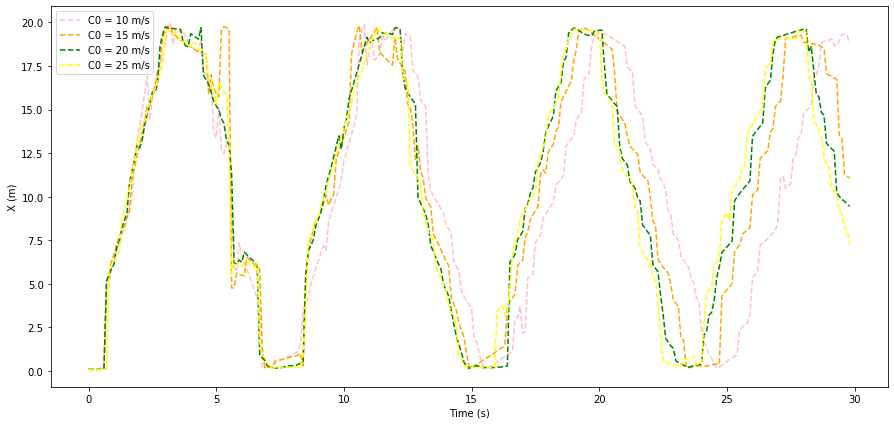

In [30]:
fig = plt.figure(figsize = (15,7))

plt.plot(time,X_C10,'--',label = 'C0 = 10 m/s',color = 'pink')
plt.plot(time,X_C15,'--',label = 'C0 = 15 m/s',color = 'orange')
plt.plot(time,X_C20,'--',label = 'C0 = 20 m/s',color = 'green')
plt.plot(time,X_C25,'--',label = 'C0 = 25 m/s',color = 'yellow')

plt.ylabel('X (m)')
plt.xlabel('Time (s)')
plt.legend()
plt.show()


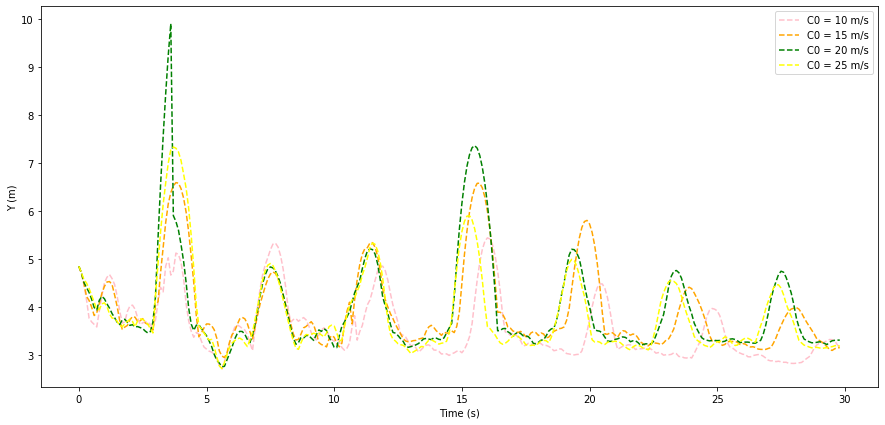

In [31]:
fig = plt.figure(figsize = (15,7))

plt.plot(time,Y_C10,'--',label = 'C0 = 10 m/s',color = 'pink')
plt.plot(time,Y_C15,'--',label = 'C0 = 15 m/s',color = 'orange')
plt.plot(time,Y_C20,'--',label = 'C0 = 20 m/s',color = 'green')
plt.plot(time,Y_C25,'--',label = 'C0 = 25 m/s',color = 'yellow')


plt.ylabel('Y (m)')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

In [32]:
cv = np.zeros(4)

C0 = [10,15,20,25]
cv[0] = abs(X_C10[230] - X_C10[220])/(10*dt_file)
cv[1] = abs(X_C15[230] - X_C15[220])/(10*dt_file)
cv[2] = abs(X_C20[230] - X_C20[220])/(10*dt_file)
cv[3] = abs(X_C25[230] - X_C25[220])/(10*dt_file)

for i in range(4):
    print('C0 = '+str(C0[i])+' m/s, wave speed = '+ str(cv[i])+' m/s')

C0 = 10 m/s, wave speed = 5.055205 m/s
C0 = 15 m/s, wave speed = 6.092669 m/s
C0 = 20 m/s, wave speed = 7.198873 m/s
C0 = 25 m/s, wave speed = 5.845593999999999 m/s
